# 2018-2019 Player Classification

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sn

In [2]:
def scrape_basketballreference(url):
    html = urlopen(url)
    soup = BeautifulSoup(html)
#     print(soup)
    soup.findAll('tr', limit=2)
    headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
    headers = headers[1:]
    rows = soup.findAll('tr')[1:]
    player_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]
    stats = pd.DataFrame(player_stats, columns = headers)
    return stats

In [3]:
totals_0 = scrape_basketballreference('https://www.basketball-reference.com/leagues/NBA_2019_totals.html')

In [4]:
totals = scrape_basketballreference('https://www.basketball-reference.com/leagues/NBA_2019_totals.html')
# per_game = scrape_basketballreference('https://www.basketball-reference.com/leagues/NBA_2019_per_game.html')
advanced = scrape_basketballreference('https://www.basketball-reference.com/leagues/NBA_2019_advanced.html')

In [5]:
advanced_0 = scrape_basketballreference('https://www.basketball-reference.com/leagues/NBA_2019_advanced.html')

In [6]:
# dropped some weird blank columns
# advanced.drop(advanced.columns[[18,23]], axis=1)

Find the columns that are the same name and determine if they're really the same

In [7]:
b = totals_0.columns.intersection(advanced_0.columns)
print(b)

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'MP'], dtype='object')


## Columns analysis:

Same: 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP' 

Groupby: 'Player', 'Pos'

Drop: 'MP_adv', 'Pos_adv', 'Age_adv', 'Pos_pg', 'Age_pg', 'G_pg', 'GS_pg'

Sum: 'MP', 

Average: 

Custom: 'GS_pg', 'MP_pg',
       'FG_pg', 'FGA_pg', 'FG%_pg', '3P_pg', '3PA_pg', '3P%_pg', '2P_pg',
       '2PA_pg', '2P%_pg', 'eFG%_pg', 'FT_pg', 'FTA_pg', 'FT%_pg', 'ORB_pg',
       'DRB_pg', 'TRB_pg', 'AST_pg', 'STL_pg', 'BLK_pg', 'TOV_pg', 'PF_pg',
       'PTS_pg' (sum up MP for all teams and divide by number of games in season)

In [8]:
tmp = pd.merge(totals, advanced, how='inner', left_on=['Player', 'Pos', 'Tm', 'Age', 'G', 'MP'], right_on=['Player','Pos', 'Tm', 'Age', 'G', 'MP'])

In [9]:
tmp.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', ' ', 'OWS', 'DWS', 'WS', 'WS/48', ' ', 'OBPM', 'DBPM', 'BPM',
       'VORP'],
      dtype='object')

In [10]:
tmp.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
0,Álex Abrines,SG,25,OKC,31,2,588,56,157,.357,...,,0.1,0.6,0.6,.053,,-3.7,0.4,-3.3,-0.2
1,Quincy Acy,PF,28,PHO,10,0,123,4,18,.222,...,,-0.1,0.0,-0.1,-0.022,,-7.6,-0.5,-8.1,-0.2
2,Jaylen Adams,PG,22,ATL,34,1,428,38,110,.345,...,,-0.1,0.2,0.1,.011,,-3.8,-0.5,-4.3,-0.2
3,Steven Adams,C,25,OKC,80,80,2669,481,809,.595,...,,5.1,4.0,9.1,.163,,0.7,0.4,1.1,2.1
4,Bam Adebayo,C,21,MIA,82,28,1913,280,486,.576,...,,3.4,3.4,6.8,.171,,-0.4,2.2,1.8,1.8
5,Deng Adel,SF,21,CLE,19,3,194,11,36,.306,...,,-0.2,0.0,-0.2,-0.054,,-6.0,-1.6,-7.5,-0.3
6,DeVaughn Akoon-Purcell,SG,25,DEN,7,0,22,3,10,.300,...,,-0.1,0.0,0.0,-0.051,,-7.9,2.1,-5.8,0.0
7,LaMarcus Aldridge,C,33,SAS,81,81,2687,684,1319,.519,...,,6.4,2.9,9.3,.167,,2.4,-0.6,1.8,2.6
8,Rawle Alkins,SG,21,CHI,10,1,120,13,39,.333,...,,-0.1,0.0,-0.1,-0.042,,-3.8,-3.5,-7.3,-0.2
9,Grayson Allen,SG,23,UTA,38,2,416,67,178,.376,...,,-0.4,0.4,0.0,.002,,-4.2,-2.1,-6.3,-0.5


In [11]:
# Find the columns where each value is null
empty_cols = [col for col in advanced.columns if advanced[col].empty]
# Drop these columns from the dataframe
advanced.drop(empty_cols,
        axis=1,
        inplace=True)

In [12]:
advanced.head(15)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
0,Álex Abrines,SG,25,OKC,31,588,6.3,.507,.809,.083,...,,0.1,0.6,0.6,.053,,-3.7,0.4,-3.3,-0.2
1,Quincy Acy,PF,28,PHO,10,123,2.9,.379,.833,.556,...,,-0.1,0.0,-0.1,-0.022,,-7.6,-0.5,-8.1,-0.2
2,Jaylen Adams,PG,22,ATL,34,428,7.6,.474,.673,.082,...,,-0.1,0.2,0.1,.011,,-3.8,-0.5,-4.3,-0.2
3,Steven Adams,C,25,OKC,80,2669,18.5,.591,.002,.361,...,,5.1,4.0,9.1,.163,,0.7,0.4,1.1,2.1
4,Bam Adebayo,C,21,MIA,82,1913,17.9,.623,.031,.465,...,,3.4,3.4,6.8,.171,,-0.4,2.2,1.8,1.8
5,Deng Adel,SF,21,CLE,19,194,2.7,.424,.639,.111,...,,-0.2,0.0,-0.2,-0.054,,-6.0,-1.6,-7.5,-0.3
6,DeVaughn Akoon-Purcell,SG,25,DEN,7,22,8.2,.322,.400,.200,...,,-0.1,0.0,0.0,-0.051,,-7.9,2.1,-5.8,0.0
7,LaMarcus Aldridge,C,33,SAS,81,2687,22.9,.576,.032,.312,...,,6.4,2.9,9.3,.167,,2.4,-0.6,1.8,2.6
8,Rawle Alkins,SG,21,CHI,10,120,8.1,.418,.308,.308,...,,-0.1,0.0,-0.1,-0.042,,-3.8,-3.5,-7.3,-0.2
9,Grayson Allen,SG,23,UTA,38,416,7.5,.516,.556,.337,...,,-0.4,0.4,0.0,.002,,-4.2,-2.1,-6.3,-0.5


In [13]:
full = pd.merge(totals, advanced, how='inner', left_on=['Player', 'Pos', 'Tm', 'Age', 'G', 'MP'], right_on=['Player','Pos', 'Tm', 'Age', 'G', 'MP'])

In [14]:
full.shape

(1384, 51)

In [15]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [16]:
full[full.duplicated(keep=False)]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
22,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
23,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
24,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
25,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
26,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
694,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
695,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
696,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [17]:
full_dedup = full.drop_duplicates()

Inspect the data _x and _y and clean up (renaming, dropping blank columns)

Getting duplicates because they played on different teams in the same season. So, use the TOT row for players with multiple teams over the season.

In [18]:
# full_dedup.replace('TOT', 'TOR')

In [19]:
full_dedup = full_dedup.sort_values('Player')

In [20]:
full_dedup['Tm'].unique()

array(['ORL', 'IND', 'OKC', 'BOS', 'POR', 'BRK', 'CLE', 'TOT', 'SAC',
       'UTA', 'LAL', 'ATL', 'GSW', 'NYK', 'PHI', 'DET', 'NOP', 'MEM',
       'MIN', 'CHI', 'HOU', 'WAS', 'LAC', 'MIA', 'CHO', 'MIL', 'DEN',
       'SAS', 'TOR', 'DAL', 'PHO', None], dtype=object)

In [21]:
full_dedup.head(15)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
922,Aaron Gordon,PF,23,ORL,78,78,2633,470,1046,.449,...,,1.8,3.3,5.1,.093,,0.3,0.3,0.6,1.7
973,Aaron Holiday,PG,22,IND,50,0,646,105,262,.401,...,,0.1,0.8,0.9,.065,,-1.7,0.1,-1.6,0.1
1173,Abdel Nader,SF,25,OKC,61,1,694,91,215,.423,...,,0.0,0.9,0.9,.062,,-3.6,0.3,-3.2,-0.2
984,Al Horford,C,32,BOS,68,68,1973,387,723,.535,...,,4.5,2.9,7.5,.181,,3.3,1.9,5.1,3.6
12,Al-Farouq Aminu,PF,28,POR,81,81,2292,257,593,.433,...,,3.0,2.8,5.8,.121,,0.1,0.6,0.7,1.5
1356,Alan Williams,PF,26,BRK,5,0,26,8,13,.615,...,,0.1,0.1,0.2,.312,,7.6,4.2,11.8,0.1
775,Alec Burks,SG,27,CLE,34,24,979,136,340,.400,...,,0.6,0.3,0.9,.042,,-0.2,-1.2,-1.4,0.1
773,Alec Burks,SG,27,TOT,64,24,1375,192,474,.405,...,,0.7,0.8,1.5,.052,,-0.6,-0.7,-1.2,0.3
776,Alec Burks,SG,27,SAC,13,0,127,9,20,.450,...,,0.0,0.2,0.2,.062,,-3.9,2.8,-1.1,0.0
774,Alec Burks,SG,27,UTA,17,0,269,47,114,.412,...,,0.2,0.3,0.5,.084,,-0.4,-0.2,-0.6,0.1


To extract only the 'TOT' row for players who played for multiple teams in the season, we've already sorted by player name. Now, let's create a column that counts the number of times the player exists. Then, create a binary value column indicating whether or not 'Tm' is 'TOT'. Final step is to loop row by row using iloc[index,:] and delete row if no. occurences > 1 AND 'Tm' != 'TOT'

In [22]:
full_dedup['is_TOT'] = full_dedup.Tm.apply(lambda x:1 if x=="TOT" else 0)

In [23]:
full_dedup.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP,is_TOT
922,Aaron Gordon,PF,23,ORL,78,78,2633,470,1046,.449,...,1.8,3.3,5.1,.093,,0.3,0.3,0.6,1.7,0
973,Aaron Holiday,PG,22,IND,50,0,646,105,262,.401,...,0.1,0.8,0.9,.065,,-1.7,0.1,-1.6,0.1,0
1173,Abdel Nader,SF,25,OKC,61,1,694,91,215,.423,...,0.0,0.9,0.9,.062,,-3.6,0.3,-3.2,-0.2,0
984,Al Horford,C,32,BOS,68,68,1973,387,723,.535,...,4.5,2.9,7.5,.181,,3.3,1.9,5.1,3.6,0
12,Al-Farouq Aminu,PF,28,POR,81,81,2292,257,593,.433,...,3.0,2.8,5.8,.121,,0.1,0.6,0.7,1.5,0
1356,Alan Williams,PF,26,BRK,5,0,26,8,13,.615,...,0.1,0.1,0.2,.312,,7.6,4.2,11.8,0.1,0
775,Alec Burks,SG,27,CLE,34,24,979,136,340,.400,...,0.6,0.3,0.9,.042,,-0.2,-1.2,-1.4,0.1,0
773,Alec Burks,SG,27,TOT,64,24,1375,192,474,.405,...,0.7,0.8,1.5,.052,,-0.6,-0.7,-1.2,0.3,1
776,Alec Burks,SG,27,SAC,13,0,127,9,20,.450,...,0.0,0.2,0.2,.062,,-3.9,2.8,-1.1,0.0,0
774,Alec Burks,SG,27,UTA,17,0,269,47,114,.412,...,0.2,0.3,0.5,.084,,-0.4,-0.2,-0.6,0.1,0


In [24]:
full_dedup.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', ' ', 'OWS', 'DWS', 'WS', 'WS/48', ' ', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'is_TOT'],
      dtype='object')

In [25]:
full_dedup['Player_count'] = full_dedup.groupby('Player')['Player'].transform('size')

In [26]:
full_dedup.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', ' ', 'OWS', 'DWS', 'WS', 'WS/48', ' ', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'is_TOT', 'Player_count'],
      dtype='object')

In [27]:
full_dedup.head(10) # column is created!

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP,is_TOT,Player_count
922,Aaron Gordon,PF,23,ORL,78,78,2633,470,1046,.449,...,3.3,5.1,.093,,0.3,0.3,0.6,1.7,0,1.0
973,Aaron Holiday,PG,22,IND,50,0,646,105,262,.401,...,0.8,0.9,.065,,-1.7,0.1,-1.6,0.1,0,1.0
1173,Abdel Nader,SF,25,OKC,61,1,694,91,215,.423,...,0.9,0.9,.062,,-3.6,0.3,-3.2,-0.2,0,1.0
984,Al Horford,C,32,BOS,68,68,1973,387,723,.535,...,2.9,7.5,.181,,3.3,1.9,5.1,3.6,0,1.0
12,Al-Farouq Aminu,PF,28,POR,81,81,2292,257,593,.433,...,2.8,5.8,.121,,0.1,0.6,0.7,1.5,0,1.0
1356,Alan Williams,PF,26,BRK,5,0,26,8,13,.615,...,0.1,0.2,.312,,7.6,4.2,11.8,0.1,0,1.0
775,Alec Burks,SG,27,CLE,34,24,979,136,340,.400,...,0.3,0.9,.042,,-0.2,-1.2,-1.4,0.1,0,4.0
773,Alec Burks,SG,27,TOT,64,24,1375,192,474,.405,...,0.8,1.5,.052,,-0.6,-0.7,-1.2,0.3,1,4.0
776,Alec Burks,SG,27,SAC,13,0,127,9,20,.450,...,0.2,0.2,.062,,-3.9,2.8,-1.1,0.0,0,4.0
774,Alec Burks,SG,27,UTA,17,0,269,47,114,.412,...,0.3,0.5,.084,,-0.4,-0.2,-0.6,0.1,0,4.0


In [28]:
full_dedup.shape

(709, 53)

In [29]:
full_dedup_final = full_dedup[(full_dedup['is_TOT']==1)|((full_dedup['is_TOT']==0) & (full_dedup['Player_count']==1))]

In [30]:
full_dedup_final.shape

(530, 53)

In [31]:
full_dedup_final.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', ' ', 'OWS', 'DWS', 'WS', 'WS/48', ' ', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'is_TOT', 'Player_count'],
      dtype='object')

In [32]:
full_dedup_final[full_dedup_final.columns[41]]

,,
922,,
973,,
1173,,
984,,
12,,
...,...,...
1199,,
1291,,
1228,,
0,,


In [33]:
full_dedup_final[full_dedup_final.columns[46]]

,,
922,,
973,,
1173,,
984,,
12,,
...,...,...
1199,,
1291,,
1228,,
0,,


In [34]:
full_dedup_final = full_dedup_final.drop(full_dedup_final.columns[[41,46]], axis=1)

In [35]:
full_dedup_final.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'is_TOT', 'Player_count'],
      dtype='object')

In [36]:
full_dedup_final.isnull().any()

Player          False
Pos             False
Age             False
Tm              False
G               False
GS              False
MP              False
FG              False
FGA             False
FG%             False
3P              False
3PA             False
3P%             False
2P              False
2PA             False
2P%             False
eFG%            False
FT              False
FTA             False
FT%             False
ORB             False
DRB             False
TRB             False
AST             False
STL             False
BLK             False
TOV             False
PF              False
PTS             False
PER             False
TS%             False
3PAr            False
FTr             False
ORB%            False
DRB%            False
TRB%            False
AST%            False
STL%            False
BLK%            False
TOV%            False
USG%            False
OWS             False
DWS             False
WS              False
WS/48           False
OBPM      

In [37]:
full_dedup_final['3P%'].unique() # found our troublemaker: ''

array(['.349', '.339', '.320', '.360', '.343', '.000', '.363', '.480',
       '.391', '.356', '.500', '.378', '.394', '', '.300', '.132', '.333',
       '.200', '.345', '.331', '.377', '.396', '.344', '.318', '.351',
       '.429', '.415', '.362', '.400', '.393', '.425', '.238', '.410',
       '.330', '.379', '.365', '.258', '.369', '.426', '.427', '.313',
       '.375', '.143', '.298', '.412', '.312', '.328', '.348', '.280',
       '.309', '.405', '.250', '.324', '.358', '.346', '.273', '.402',
       '.322', '.291', '.421', '.294', '.397', '.368', '.388', '.433',
       '.455', '.462', '.290', '.416', '.407', '.371', '.305', '.289',
       '.156', '.274', '.342', '.261', '.341', '.296', '.218', '.308',
       '.370', '.338', '.326', '.310', '.281', '.382', '.529', '.265',
       '.311', '.408', '.285', '.286', '.437', '.307', '.100', '.432',
       '.259', '.314', '.295', '.329', '1.000', '.340', '.212', '.219',
       '.287', '.297', '.354', '.256', '.323', '.321', '.167', '.395',
 

In [38]:
full_dedup_final.replace(to_replace='', value=0, inplace=True)

Let's actually filter out our rows to only include players who played at least 16 games or 20% of the season

In [39]:
full_dedup_final.dtypes

Player           object
Pos              object
Age              object
Tm               object
G                object
GS               object
MP               object
FG               object
FGA              object
FG%              object
3P               object
3PA              object
3P%              object
2P               object
2PA              object
2P%              object
eFG%             object
FT               object
FTA              object
FT%              object
ORB              object
DRB              object
TRB              object
AST              object
STL              object
BLK              object
TOV              object
PF               object
PTS              object
PER              object
TS%              object
3PAr             object
FTr              object
ORB%             object
DRB%             object
TRB%             object
AST%             object
STL%             object
BLK%             object
TOV%             object
USG%             object
OWS             

Convert the necessary columns to numeric

In [40]:
str_col = [col for col in full_dedup_final.columns if full_dedup_final[col].dtype=='object' and col not in ['Player', 'Pos', 'Tm']]

In [41]:
full_dedup_final[str_col] = full_dedup_final[str_col].apply(pd.to_numeric, errors='coerce')

In [42]:
full_dedup_final.dtypes

Player           object
Pos              object
Age               int64
Tm               object
G                 int64
GS                int64
MP                int64
FG                int64
FGA               int64
FG%             float64
3P                int64
3PA               int64
3P%             float64
2P                int64
2PA               int64
2P%             float64
eFG%            float64
FT                int64
FTA               int64
FT%             float64
ORB               int64
DRB               int64
TRB               int64
AST               int64
STL               int64
BLK               int64
TOV               int64
PF                int64
PTS               int64
PER             float64
TS%             float64
3PAr            float64
FTr             float64
ORB%            float64
DRB%            float64
TRB%            float64
AST%            float64
STL%            float64
BLK%            float64
TOV%            float64
USG%            float64
OWS             

In [43]:
stats = full_dedup_final[full_dedup_final.G > 15]

## PCA

We'll want to use PCA to reduce dimensionality since there are tons of features that we don't know necessarily which ones may be actually influential. It'll also be good to remove any features that may be highly correlated with another feature.

First, we'll need to drop all unnecessary columns before using PCA. We'll drop non-numeric columns unless they need to be one-hot-encoded. Player, Position, Age, and Team probably won't be important for classification. We can link back Player later after we do PCA since there is no good way to convert to numeric. We'll ignore position and see if we can classify in an unsupervised manner.

In [44]:
drop = ['Player','Pos', 'Age', 'Tm']
stats_train = stats.drop(columns=drop) # full_dedup_final has our player labels
stats_train.head()

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,is_TOT,Player_count
922,78,78,2633,470,1046,0.449,121,347,0.349,349,...,1.8,3.3,5.1,0.093,0.3,0.3,0.6,1.7,0,1.0
973,50,0,646,105,262,0.401,43,127,0.339,62,...,0.1,0.8,0.9,0.065,-1.7,0.1,-1.6,0.1,0,1.0
1173,61,1,694,91,215,0.423,32,100,0.320,59,...,0.0,0.9,0.9,0.062,-3.6,0.3,-3.2,-0.2,0,1.0
984,68,68,1973,387,723,0.535,73,203,0.360,314,...,4.5,2.9,7.5,0.181,3.3,1.9,5.1,3.6,0,1.0
12,81,81,2292,257,593,0.433,96,280,0.343,161,...,3.0,2.8,5.8,0.121,0.1,0.6,0.7,1.5,0,1.0


In [45]:
stats_train.dtypes

G                 int64
GS                int64
MP                int64
FG                int64
FGA               int64
FG%             float64
3P                int64
3PA               int64
3P%             float64
2P                int64
2PA               int64
2P%             float64
eFG%            float64
FT                int64
FTA               int64
FT%             float64
ORB               int64
DRB               int64
TRB               int64
AST               int64
STL               int64
BLK               int64
TOV               int64
PF                int64
PTS               int64
PER             float64
TS%             float64
3PAr            float64
FTr             float64
ORB%            float64
DRB%            float64
TRB%            float64
AST%            float64
STL%            float64
BLK%            float64
TOV%            float64
USG%            float64
OWS             float64
DWS             float64
WS              float64
WS/48           float64
OBPM            

In [46]:
stats_train.isnull().sum()

G               0
GS              0
MP              0
FG              0
FGA             0
FG%             0
3P              0
3PA             0
3P%             0
2P              0
2PA             0
2P%             0
eFG%            0
FT              0
FTA             0
FT%             0
ORB             0
DRB             0
TRB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
PTS             0
PER             0
TS%             0
3PAr            0
FTr             0
ORB%            0
DRB%            0
TRB%            0
AST%            0
STL%            0
BLK%            0
TOV%            0
USG%            0
OWS             0
DWS             0
WS              0
WS/48           0
OBPM            0
DBPM            0
BPM             0
VORP            0
is_TOT          0
Player_count    0
dtype: int64

In [47]:
full_dedup_final.shape

(530, 51)

In [48]:
stats_train.shape

(440, 47)

#### Rescaling 

In [49]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
stats_scaled=pd.DataFrame(scaler.fit_transform(stats_train))
stats_scaled.columns=stats_train.columns

In [50]:
stats_scaled.shape

(440, 47)

In [51]:
stats_scaled.isnull().any()

G               False
GS              False
MP              False
FG              False
FGA             False
FG%             False
3P              False
3PA             False
3P%             False
2P              False
2PA             False
2P%             False
eFG%            False
FT              False
FTA             False
FT%             False
ORB             False
DRB             False
TRB             False
AST             False
STL             False
BLK             False
TOV             False
PF              False
PTS             False
PER             False
TS%             False
3PAr            False
FTr             False
ORB%            False
DRB%            False
TRB%            False
AST%            False
STL%            False
BLK%            False
TOV%            False
USG%            False
OWS             False
DWS             False
WS              False
WS/48           False
OBPM            False
DBPM            False
BPM             False
VORP            False
is_TOT    

In [52]:
from sklearn.decomposition import PCA
n_components=stats_train.shape[1]
pca = PCA(n_components=n_components, random_state=123)
pca.fit(stats_scaled)

PCA(n_components=47, random_state=123)

In [53]:
explained_variance_ratio = pca.explained_variance_ratio_ 
cum_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
lst = []
for i in range (0, n_components):
    lst.append([i+1, round(explained_variance_ratio[i],6), cum_explained_variance_ratio[i]])

pca_predictor = pd.DataFrame(lst)
pca_predictor.columns = ['Component', 'Explained Variance', 'Cumulative Explained Variance']
pca_predictor

,Component,Explained Variance,Cumulative Explained Variance
0,1,0.432968,0.432968
1,2,0.155437,0.588405
2,3,0.127787,0.716192
3,4,0.055410,0.771601
4,5,0.040362,0.811964
5,6,0.031395,0.843359
6,7,0.027927,0.871286
7,8,0.021567,0.892853
8,9,0.016311,0.909163
9,10,0.013298,0.922462


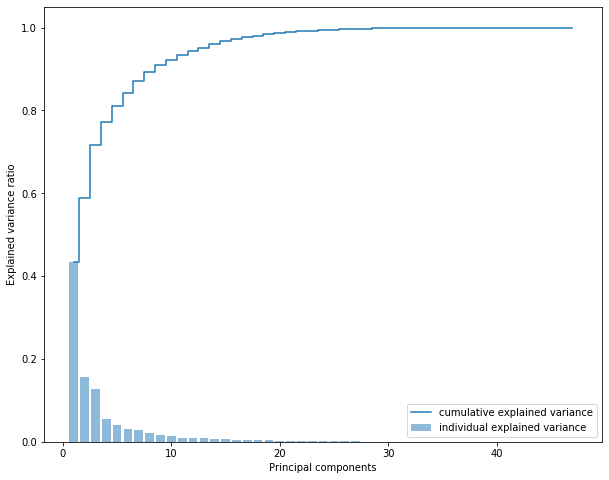

In [54]:
plt.subplots(figsize=(10,8))

plt.bar(pca_predictor['Component'],pca_predictor['Explained Variance'], align='center', alpha=0.5, 
       label='individual explained variance')
plt.step(pca_predictor['Component'],pca_predictor['Cumulative Explained Variance'], where='mid',
         label='cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio');
plt.legend(loc='best')

Pick n_components = 9 because explains 90% of cumulative variance 

In [55]:
pca = PCA(n_components=9)
pca.fit(stats_scaled)

PCA(n_components=9)

In [56]:
stats_transformed = pca.fit_transform(stats_scaled)
stats_transformed.shape

(440, 9)

### K-means

In [57]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,40)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(stats_scaled) # or stats_transformed?
    Sum_of_squared_distances.append(km.inertia_)

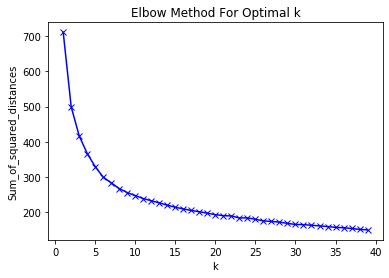

In [58]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

https://stackoverflow.com/questions/51762514/find-the-elbow-point-on-an-optimization-curve-with-python

Kneedle Algorithm: https://raghavan.usc.edu/papers/kneedle-simplex11.pdf

Documentation: https://github.com/arvkevi/kneed

8


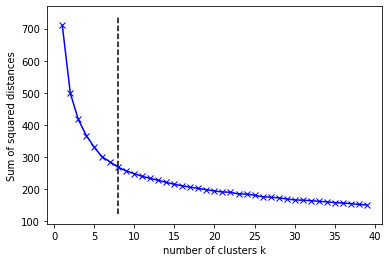

In [59]:
x = range(1, len(Sum_of_squared_distances)+1)

from kneed import KneeLocator
kn = KneeLocator(x, Sum_of_squared_distances, curve='convex', direction='decreasing')
print(kn.knee)
5

import matplotlib.pyplot as plt
plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.plot(x, Sum_of_squared_distances, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

In [60]:
n_clusters = 8 # from our Kneedle method
kmeans = KMeans(n_clusters=n_clusters, random_state=123)
kmeans.fit(stats_transformed)

KMeans(random_state=123)

somewhere we need to get the player labels reattached to the rows...

In [61]:
cluster_labels = kmeans.labels_

stats['cluster'] = cluster_labels #stats_train doesn't have the player labels

/Users/dereklee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


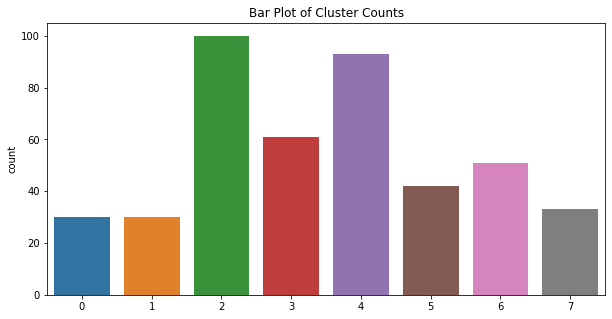

In [62]:
import seaborn as sns

ax=plt.subplots(figsize=(10,5))
ax=sns.countplot(cluster_labels)
title="Bar Plot of Cluster Counts"
ax.set_title(title, fontsize=12)
plt.show()

In [63]:
def cluster_stats(columns):
    output = pd.DataFrame({'cluster':[ i for i in range(n_clusters)]})
    for column in columns:
        lst = []
        for i in range(n_clusters):
            mean = stats[stats['cluster'] == i].describe()[column]['mean']
            lst.append([i, round(mean,2)])
        df = pd.DataFrame(lst)
        df.columns = ['cluster', column]
        output = pd.merge(output, df, on='cluster', how='outer')
    return output

In [64]:
columns = stats_train.columns
cluster_stats(columns)

,cluster,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,is_TOT,Player_count
0,0,37.53,5.17,560.77,72.97,177.70,0.41,23.83,73.50,0.32,...,0.11,0.44,0.56,0.05,-2.64,-0.60,-3.24,-0.15,1.00,3.13
1,1,74.03,47.97,1897.87,368.17,644.87,0.58,17.37,55.70,0.21,...,4.07,2.80,6.86,0.17,1.05,0.70,1.73,1.83,0.07,1.13
2,2,37.53,5.08,524.38,66.74,163.35,0.40,25.45,75.92,0.32,...,0.09,0.43,0.52,0.04,-2.82,-0.45,-3.28,-0.11,0.00,1.00
3,3,74.10,66.39,2205.85,369.74,819.57,0.45,126.64,338.11,0.37,...,2.37,2.17,4.54,0.10,0.19,-0.03,0.15,1.17,0.00,1.00
4,4,66.34,19.49,1497.06,226.86,521.74,0.44,79.02,224.31,0.35,...,0.96,1.34,2.30,0.07,-1.06,-0.18,-1.24,0.30,0.00,1.00
5,5,64.88,33.17,1625.33,245.81,569.40,0.43,90.50,254.12,0.34,...,1.11,1.36,2.47,0.08,-0.86,-0.32,-1.16,0.35,1.00,3.05
6,6,49.73,10.90,749.59,116.61,218.55,0.54,6.86,22.47,0.14,...,1.06,0.91,1.97,0.13,-1.27,0.68,-0.59,0.26,0.04,1.08
7,7,74.09,71.09,2482.67,618.12,1298.18,0.48,143.15,399.61,0.33,...,5.35,2.93,8.27,0.16,4.32,0.39,4.71,4.16,0.03,1.06


#### Looking at our clusters to see how we can describe the players grouped into it

In [65]:
stats[stats['cluster']==0]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,is_TOT,Player_count,cluster
952,Andrew Harrison,PG,24,TOT,17,0,187,16,53,0.302,...,0.0,-0.1,-0.027,-5.8,-1.2,-7.1,-0.2,1,4.0,0
1048,Brandon Knight,PG,27,TOT,39,26,736,99,260,0.381,...,0.0,0.0,-0.002,-3.5,-2.0,-5.4,-0.6,1,3.0,0
1134,C.J. Miles,SF,31,TOT,53,1,856,112,311,0.360,...,0.9,0.7,0.041,-2.4,-0.5,-2.9,-0.2,1,3.0,0
1303,Caleb Swanigan,PF,21,TOT,21,0,178,18,53,0.340,...,0.2,-0.2,-0.060,-7.1,0.0,-7.2,-0.2,1,3.0,0
1208,Cameron Payne,PG,24,TOT,40,13,712,96,223,0.430,...,0.3,0.5,0.031,-2.3,-0.7,-3.0,-0.2,1,3.0,0
1366,Christian Wood,PF,23,TOT,21,2,251,61,117,0.521,...,0.3,0.8,0.151,1.4,-1.0,0.4,0.1,1,3.0,0
750,Corey Brewer,SF,32,TOT,31,3,492,53,123,0.431,...,0.6,1.0,0.095,-2.9,1.6,-1.3,0.1,1,3.0,0
1067,Courtney Lee,SG,33,TOT,34,6,428,53,129,0.411,...,0.4,0.4,0.050,-3.4,0.8,-2.5,-0.1,1,3.0,0
1148,Greg Monroe,C,28,TOT,43,2,480,92,189,0.487,...,0.7,1.1,0.108,-2.0,-1.3,-3.2,-0.1,1,4.0,0
870,Henry Ellenson,PF,22,TOT,19,0,259,39,95,0.411,...,0.2,0.4,0.077,-1.0,-0.5,-1.5,0.0,1,3.0,0


In [66]:
stats[stats['cluster']==1]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,is_TOT,Player_count,cluster
1072,Alex Len,C,25,ATL,77,31,1544,320,648,0.494,...,1.0,3.2,0.100,0.0,-1.3,-1.2,0.3,0,1.0,1
864,Andre Drummond,C,25,DET,79,79,2647,561,1052,0.533,...,5.9,10.0,0.181,1.3,0.8,2.1,2.7,0,1.0,1
4,Bam Adebayo,C,21,MIA,82,28,1913,280,486,0.576,...,3.4,6.8,0.171,-0.4,2.2,1.8,1.8,0,1.0,1
788,Clint Capela,C,24,HOU,67,67,2249,474,732,0.648,...,3.0,10.8,0.230,3.3,-0.3,3.0,2.8,0,1.0,1
1036,DeAndre Jordan,C,30,TOT,69,69,2047,286,446,0.641,...,3.1,7.1,0.167,0.8,1.3,2.1,2.1,1,3.0,1
704,Deandre Ayton,C,20,PHO,71,70,2183,509,870,0.585,...,1.7,5.8,0.128,1.3,-1.1,0.2,1.2,0,1.0,1
890,Derrick Favors,C,27,UTA,76,70,1766,363,619,0.586,...,3.5,7.9,0.215,1.8,1.5,3.3,2.4,0,1.0,1
1251,Domantas Sabonis,C,22,IND,74,5,1838,413,700,0.590,...,3.3,7.6,0.197,1.9,1.3,3.1,2.4,0,1.0,1
1224,Dwight Powell,C,27,DAL,77,22,1662,290,486,0.597,...,1.9,7.5,0.215,2.0,0.9,2.9,2.1,0,1.0,1
839,Ed Davis,C,29,BRK,81,1,1446,186,302,0.616,...,2.5,5.7,0.191,-0.6,0.7,0.0,0.7,0,1.0,1


In [67]:
stats[stats['cluster']==2]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,is_TOT,Player_count,cluster
973,Aaron Holiday,PG,22,IND,50,0,646,105,262,0.401,...,0.8,0.9,0.065,-1.7,0.1,-1.6,0.1,0,1.0,2
1173,Abdel Nader,SF,25,OKC,61,1,694,91,215,0.423,...,0.9,0.9,0.062,-3.6,0.3,-3.2,-0.2,0,1.0,2
796,Alex Caruso,PG,24,LAL,25,4,531,77,173,0.445,...,0.6,1.0,0.093,-1.0,0.7,-0.2,0.2,0,1.0,2
1226,Alex Poythress,PF,25,ATL,21,1,305,40,81,0.494,...,0.2,0.5,0.086,-2.5,-1.0,-3.5,-0.1,0,1.0,2
826,Allen Crabbe,SG,26,BRK,43,20,1133,137,373,0.367,...,1.0,0.8,0.035,-2.4,-0.4,-2.8,-0.2,0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,Troy Williams,SF,24,SAC,21,0,312,44,98,0.449,...,0.3,0.4,0.064,-2.4,0.0,-2.4,0.0,0,1.0,2
1093,Tyler Lydon,PF,22,DEN,25,0,94,9,18,0.500,...,0.1,0.2,0.086,-2.8,-1.4,-4.2,-0.1,0,1.0,2
1345,Tyrone Wallace,PG,24,LAC,62,0,628,92,217,0.424,...,0.5,-0.3,-0.023,-5.6,-0.8,-6.4,-0.7,0,1.0,2
710,Wade Baldwin,PG,22,POR,16,0,94,10,33,0.303,...,0.1,-0.3,-0.153,-8.4,-1.9,-10.3,-0.2,0,1.0,2


In [68]:
stats[stats['cluster']==3]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,is_TOT,Player_count,cluster
922,Aaron Gordon,PF,23,ORL,78,78,2633,470,1046,0.449,...,3.3,5.1,0.093,0.3,0.3,0.6,1.7,0,1.0,3
984,Al Horford,C,32,BOS,68,68,1973,387,723,0.535,...,2.9,7.5,0.181,3.3,1.9,5.1,3.6,0,1.0,3
12,Al-Farouq Aminu,PF,28,POR,81,81,2292,257,593,0.433,...,2.8,5.8,0.121,0.1,0.6,0.7,1.5,0,1.0,3
1355,Andrew Wiggins,SF,23,MIN,73,73,2543,498,1209,0.412,...,1.3,0.6,0.012,-1.2,-1.8,-3.0,-0.6,0,1.0,3
740,Bojan Bogdanović,SF,29,IND,81,81,2573,522,1051,0.497,...,2.8,6.8,0.126,1.3,-0.6,0.7,1.7,0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,Rudy Gay,PF,32,SAS,69,51,1842,376,746,0.504,...,2.2,4.4,0.115,0.8,0.6,1.4,1.6,0,1.0,3
919,Shai Gilgeous-Alexander,PG,20,LAC,82,73,2174,341,716,0.476,...,1.9,3.3,0.074,-0.9,0.4,-0.5,0.8,0,1.0,3
1374,Thaddeus Young,PF,30,IND,81,81,2489,443,841,0.527,...,3.9,6.9,0.133,0.4,1.1,1.5,2.2,0,1.0,3
1257,Tomáš Satoranský,PG,27,WAS,80,54,2164,257,530,0.485,...,0.9,4.7,0.104,-0.4,-0.3,-0.7,0.7,0,1.0,3


In [69]:
stats[stats['cluster']==4]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,is_TOT,Player_count,cluster
1126,Alfonzo McKinnie,SF,26,GSW,72,5,1003,134,275,0.487,...,0.9,2.1,0.100,-2.2,-1.3,-3.5,-0.4,0,1.0,4
1326,Allonzo Trier,SG,23,NYK,64,3,1459,232,518,0.448,...,0.5,0.9,0.030,-1.6,-1.5,-3.1,-0.4,0,1.0,4
992,Andre Iguodala,SF,35,GSW,68,13,1578,151,302,0.500,...,1.8,4.2,0.129,0.1,1.7,1.8,1.5,0,1.0,4
739,Bogdan Bogdanović,SG,26,SAC,70,17,1947,361,863,0.418,...,1.4,2.7,0.067,-0.1,-0.6,-0.6,0.7,0,1.0,4
760,Bruce Brown,SG,22,DET,74,56,1449,125,314,0.398,...,1.6,1.5,0.048,-4.4,1.0,-3.3,-0.5,0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,Vince Carter,PF,42,ATL,76,9,1330,196,468,0.419,...,0.7,1.9,0.070,-0.4,-0.3,-0.7,0.5,0,1.0,4
999,Wesley Iwundu,SF,24,ORL,68,13,1233,113,274,0.412,...,1.4,1.9,0.073,-3.8,0.6,-3.2,-0.4,0,1.0,4
717,Will Barton,SF,28,DEN,43,38,1189,185,460,0.402,...,1.1,1.2,0.049,-1.1,-0.8,-1.8,0.0,0,1.0,4
894,Yogi Ferrell,PG,25,SAC,71,3,1067,153,352,0.435,...,0.6,1.9,0.087,-1.0,-0.4,-1.4,0.2,0,1.0,4


In [70]:
stats[stats['cluster']==5]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,is_TOT,Player_count,cluster
773,Alec Burks,SG,27,TOT,64,24,1375,192,474,0.405,...,0.8,1.5,0.052,-0.6,-0.7,-1.2,0.3,1,4.0,5
1237,Austin Rivers,SG,26,TOT,76,15,2028,232,572,0.406,...,0.8,1.2,0.028,-3.3,-1.0,-4.3,-1.1,1,3.0,5
746,Avery Bradley,SG,28,TOT,63,63,1905,248,608,0.408,...,1.0,0.3,0.009,-2.8,-0.9,-3.7,-0.8,1,3.0,5
1221,Bobby Portis,PF,23,TOT,50,28,1299,279,628,0.444,...,1.1,1.6,0.060,-0.2,-2.3,-2.4,-0.1,1,3.0,5
1254,Dario Šarić,PF,24,TOT,81,41,2023,304,696,0.437,...,1.2,3.5,0.084,-0.3,-1.3,-1.6,0.2,1,3.0,5
1369,Delon Wright,PG,26,TOT,75,13,1699,242,558,0.434,...,2.4,4.3,0.121,0.1,1.4,1.5,1.5,1,3.0,5
1282,Dennis Smith Jr.,PG,21,TOT,53,50,1508,278,650,0.428,...,1.2,0.0,0.001,-1.6,-0.4,-1.9,0.0,1,3.0,5
1308,Garrett Temple,SG,32,TOT,75,55,2040,208,493,0.422,...,2.0,2.2,0.052,-3.3,0.5,-2.8,-0.4,1,3.0,5
969,George Hill,PG,32,TOT,60,13,1302,170,376,0.452,...,1.3,2.8,0.103,-1.9,0.5,-1.4,0.2,1,3.0,5
714,Harrison Barnes,PF-SF,26,TOT,77,77,2533,431,1027,0.420,...,1.6,3.6,0.068,-0.2,-1.2,-1.4,0.4,1,3.0,5


In [71]:
stats[stats['cluster']==6] # traditional "Big Men"

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,is_TOT,Player_count,cluster
1015,Amir Johnson,C,31,PHI,51,6,529,79,157,0.503,...,0.7,1.1,0.098,-2.9,0.6,-2.3,0.0,0,1.0,6
1380,Ante Žižić,C,22,CLE,59,25,1082,183,331,0.553,...,0.3,2.0,0.087,-1.1,-2.1,-3.2,-0.3,0,1.0,6
721,Aron Baynes,C,32,BOS,51,18,821,105,223,0.471,...,1.1,2.4,0.139,-1.8,0.3,-1.5,0.1,0,1.0,6
734,Bismack Biyombo,C,26,CHO,54,32,783,89,156,0.571,...,0.8,2.0,0.125,-2.4,0.0,-2.5,-0.1,0,1.0,6
1105,Boban Marjanović,C,30,TOT,58,12,681,160,260,0.615,...,0.9,3.0,0.212,2.8,0.3,3.2,0.9,1,3.0,6
852,Cheick Diallo,PF,22,NOP,64,1,896,168,271,0.620,...,1.2,2.6,0.140,-1.1,0.1,-0.9,0.2,0,1.0,6
745,Chris Boucher,PF,26,TOR,28,0,163,34,76,0.447,...,0.4,0.7,0.194,-0.2,2.8,2.6,0.2,0,1.0,6
1376,Cody Zeller,C,26,CHO,49,47,1243,190,345,0.551,...,1.2,3.9,0.150,-0.6,0.7,0.1,0.7,0,1.0,6
891,Cristiano Felício,C,26,CHI,60,0,746,95,179,0.531,...,0.4,1.4,0.088,-2.0,-2.1,-4.1,-0.4,0,1.0,6
1030,Damian Jones,C,23,GSW,24,22,410,53,74,0.716,...,0.5,1.5,0.173,-0.6,1.7,1.1,0.3,0,1.0,6


In [72]:
stats[stats['cluster']==7]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,is_TOT,Player_count,cluster
837,Anthony Davis,C,25,NOP,56,56,1850,530,1026,0.517,...,3.1,9.5,0.247,7.1,2.3,9.4,5.3,0,1.0,7
1275,Ben Simmons,PG,22,PHI,79,79,2700,540,960,0.563,...,3.6,8.2,0.146,2.2,1.3,3.6,3.8,0,1.0,7
937,Blake Griffin,PF,29,DET,75,75,2622,619,1341,0.462,...,2.9,8.0,0.147,4.9,0.2,5.1,4.7,0,1.0,7
723,Bradley Beal,SG,25,WAS,82,82,3028,764,1609,0.475,...,1.7,7.6,0.120,3.8,-0.8,2.9,3.7,0,1.0,7
1250,D'Angelo Russell,PG,22,BRK,81,81,2448,659,1517,0.434,...,2.6,5.0,0.097,4.0,-0.6,3.4,3.4,0,1.0,7
1077,Damian Lillard,PG,28,POR,80,80,2838,681,1533,0.444,...,2.4,12.1,0.205,6.6,-0.3,6.4,6.0,0,1.0,7
898,De'Aaron Fox,PG,21,SAC,81,81,2546,505,1102,0.458,...,2.5,5.6,0.106,1.3,0.2,1.5,2.3,0,1.0,7
850,DeMar DeRozan,SG,29,SAS,77,77,2688,631,1313,0.481,...,2.6,6.3,0.112,1.0,0.1,1.1,2.2,0,1.0,7
744,Devin Booker,SG,22,PHO,64,64,2242,586,1255,0.467,...,0.3,3.5,0.076,3.3,-2.3,1.0,1.7,0,1.0,7
1145,Donovan Mitchell,SG,22,UTA,77,77,2598,661,1530,0.432,...,3.7,5.0,0.092,1.2,0.1,1.3,2.2,0,1.0,7
